In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

#### Import scraped data

In [2]:
judges = pd.read_csv("./trac_judge_asylum_2012_7.csv")

In [3]:
judges

,imm_st,imm_ct,judge,decisions,per_grants,per_denials
0,"Adelanto, Calif.",Adelanto,"Everett, Timothy R.",322,9.6,90.4
1,"Adelanto, Calif.",Adelanto,"Lee, Amy T.",492,9.6,90.4
2,"Adelanto, Calif.",Adelanto,"McGrail, Elizabeth H.",281,11.0,89.0
3,"Adelanto, Calif.",Adelanto,"Left, James M.",172,11.0,89.0
4,"Adelanto, Calif.",Adelanto,"Dorfman, Arlene E.",136,14.7,85.3
5,"Adelanto, Calif.",Adelanto,"Burke, David H.",141,19.1,80.9
6,"Adelanto, Calif.",Arlington,"Harris, Rodger C.",371,10.8,89.2
7,"Adelanto, Calif.",Arlington,"Bain, Quynh Vu",193,57.5,42.5
8,"Adelanto, Calif.",Arlington,"Owens, Robert P.",300,64.3,35.7
9,"Adelanto, Calif.",Arlington,"Snow, Thomas G.",964,68.4,31.6


#### Group cities together and average denials and grants by immigration judge. 

In [4]:
cities = judges.groupby('decisions').mean()
cities

,per_grants,per_denials
decisions,,
100,34.000000,66.000000
101,38.600000,61.400000
102,23.500000,76.500000
106,50.000000,50.000000
107,44.900000,55.100000
108,16.700000,83.300000
109,14.700000,85.300000
112,2.250000,97.750000
115,71.300000,28.700000


#### Do the same thing as above only leave only the top five cities. 

In [5]:
denial_city = judges.groupby('imm_ct').per_denials.mean()
top_denial = denial_city.sort_values(ascending=False).head(5)
top_denial

imm_ct
El Paso     96.660000
Lumpkin     96.466667
Oakdale     93.800000
Eloy        93.780000
Florence    93.150000
Name: per_denials, dtype: float64

#### Create a test graph 

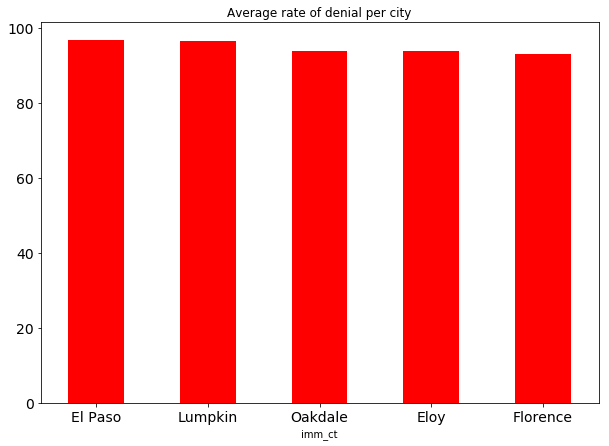

In [6]:
denial_chart = denial_city.sort_values(ascending=False).head(5)
denial_chart.plot.bar(
    color='red', 
    figsize=(10,7),
    title='Average rate of denial per city',
    rot=0,
    fontsize='14'
)


#### Create the chart using matplotlib. 

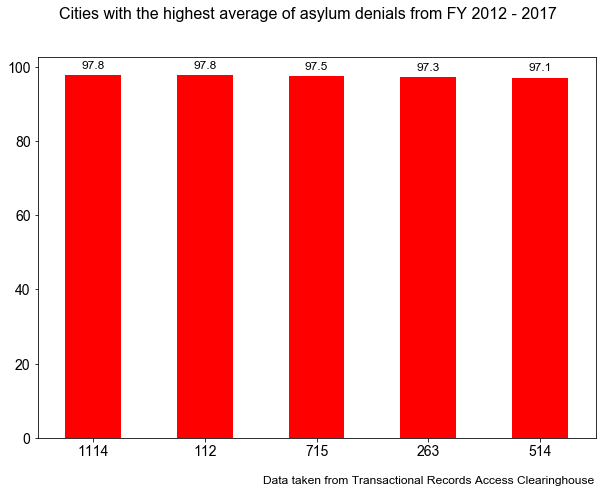

In [7]:
ax = cities.sort_values(
    'per_denials', ascending=False
).head(5).plot(y="per_denials", kind="bar", figsize=(10,7),
               color='r', rot=0, fontsize=14, legend=False
)
#add annotations above bar graph
for p in ax.patches: ax.annotate(
    np.round(p.get_height(),decimals=1
            ), (p.get_x()+p.get_width()/2., p.get_height()), 
    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.xlabel(
    "Data taken from Transactional Records Access Clearinghouse", fontsize=12
)#replaces bottom label with source
ax.xaxis.set_label_coords(.7, -0.1)
plt.suptitle('Cities with the highest average of asylum denials from FY 2012 - 2017', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.savefig('./asylum_graph_highest.png', bbbox_inches='tight') #save chart 
plt.show()

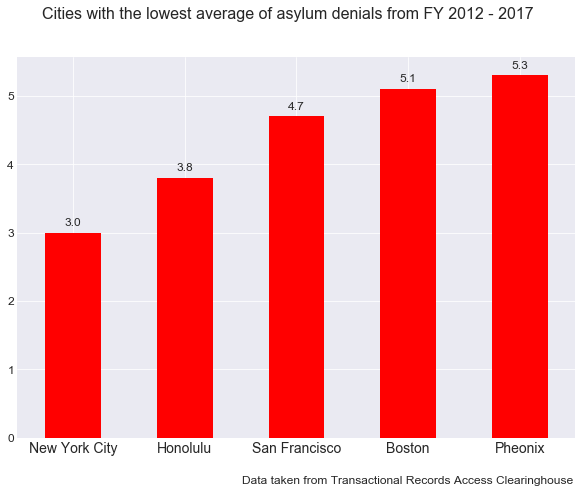

In [8]:
ax = cities.sort_values(
    'per_denials', ascending=True
).head(5).plot(y="per_denials", kind="bar", figsize=(10,7),
               color='r', rot=0, fontsize=12, legend=False
)
#add annotations above bar graph
for p in ax.patches: ax.annotate(
    np.round(p.get_height(),decimals=1
            ), (p.get_x()+p.get_width()/2., p.get_height()), 
    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.xlabel(
    "Data taken from Transactional Records Access Clearinghouse", fontsize=12
)#replaces bottom label with source
ax.xaxis.set_label_coords(.7, -0.1)
plt.suptitle('Cities with the lowest average of asylum denials from FY 2012 - 2017', fontsize=16)
# Replace xlabels with just the city name
plt.xticks(np.arange(5), ('New York City', 'Honolulu', 'San Francisco', 'Boston', 'Pheonix'), fontsize=14)
#set grid style and print
plt.style.use('seaborn-darkgrid')
plt.savefig('./asylum_graph_lowest.png', bbbox_inches='tight') #save chart 
plt.show()

In [11]:
judges_city = pd.read_csv('trac_judges_ByCity.csv')
judges_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
imm_ct           53 non-null object
NoJudges         53 non-null int64
decisions        53 non-null int64
No_DenialsRnd    53 non-null int64
Percent          53 non-null float64
AveByCt          53 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.6+ KB


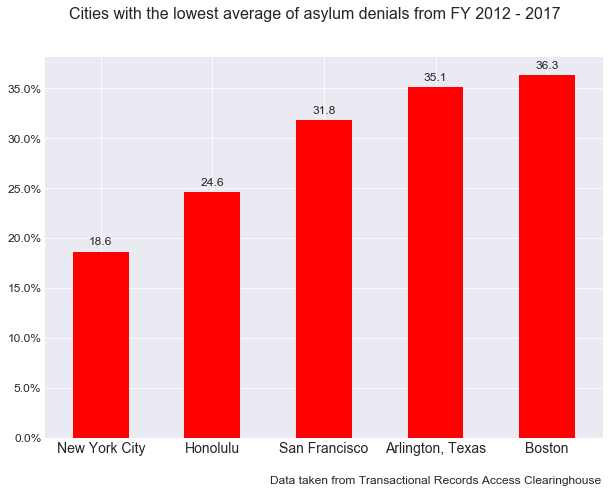

In [35]:
ax = judges_city.sort_values(
    'AveByCt', ascending=True
).head(5).plot(y="AveByCt", kind="bar", figsize=(10,7),
               color='r', rot=0, fontsize=12, legend=False
)
#add annotations above bar graph
for p in ax.patches: ax.annotate(
    np.round(p.get_height(),decimals=1
            ), (p.get_x()+p.get_width()/2., p.get_height()), 
    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.xlabel(
    "Data taken from Transactional Records Access Clearinghouse", fontsize=12
)#replaces bottom label with source
#add percent sign
ax.yaxis.set_major_formatter(PercentFormatter())
#replace
ax.xaxis.set_label_coords(.7, -0.1)
plt.suptitle('Cities with the lowest average of asylum denials from FY 2012 - 2017', fontsize=16)
# Replace xlabels with just the city name
plt.xticks(np.arange(5), ('New York City', 'Honolulu', 'San Francisco', 'Arlington, Texas', 'Boston'), fontsize=14)
#set grid style and print
plt.style.use('seaborn-darkgrid')
plt.savefig('./asylum_graph_lowest.png', bbbox_inches='tight') #save chart 
plt.show()

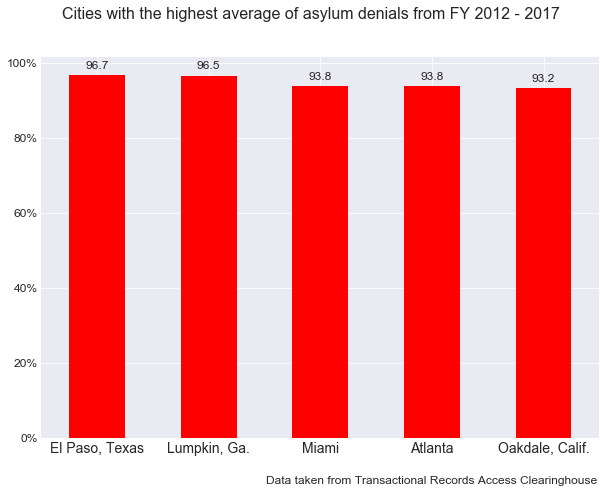

In [36]:
ax = judges_city.sort_values(
    'AveByCt', ascending=False
).head(5).plot(y="AveByCt", kind="bar", figsize=(10,7),
               color='r', rot=0, fontsize=12, legend=False
)
#add annotations above bar graph
for p in ax.patches: ax.annotate(
    np.round(p.get_height(),decimals=1
            ), (p.get_x()+p.get_width()/2., p.get_height()), 
    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.xlabel(
    "Data taken from Transactional Records Access Clearinghouse", fontsize=12
)#replaces bottom label with source
#add percent sign
ax.yaxis.set_major_formatter(PercentFormatter())

# replace
ax.xaxis.set_label_coords(.7, -0.1)
plt.suptitle('Cities with the highest average of asylum denials from FY 2012 - 2017', fontsize=16)
# Replace xlabels with just the city name
plt.xticks(np.arange(5), ('El Paso, Texas', 'Lumpkin, Ga.', 'Miami', 'Atlanta', 'Oakdale, Calif.'), fontsize=14)
#set grid style and print
plt.style.use('seaborn-darkgrid')
plt.savefig('./asylum_graph_lowest.png', bbbox_inches='tight') #save chart 
plt.show()